<H1>GUI</H1>

1/1 [==============================] - 0s 31ms/step


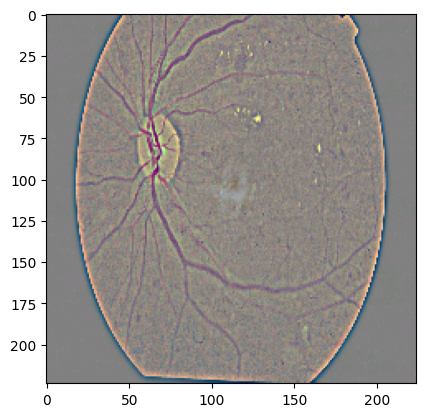

In [86]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import cv2
import numpy as np
from tkinter import PhotoImage
import tensorflow as tf
import pandas as pd
import os

import tensorflow as tf
import matplotlib.pyplot as plt


model=tf.keras.models.load_model('blind.h5')


class ProjectInfoWindow:
    def __init__(self, master):
        self.master = master
        self.master.title("Project Information")

        self.title_label = tk.Label(self.master, text="BLINDNESS DETECTION", font=("Times New Roman", 20, "bold"), bg='lightblue')
        self.title_label.pack(pady=5)

        project_description = (
        "Diabetic Retinopathy Detection (Blindness Detection)\n"
        "This project is a part of my internship at CodeClause. "
        "It involves the use of Convolutional Neural Networks (CNN)\n "
        "algorithm to train a model for Diabetic Retinopathy Detection, "
        "commonly known as Blindness Detection. \nThe model achieves an accuracy "
        "of approximately 98%.\n !!!Thank you!!!")

             
    
        self.master.configure(bg='lightblue')
        self.master.geometry("800x600")

   
        self.info_label = tk.Label(self.master, text=project_description, font=("Times New Roman", 12), bg='lightblue')
        self.info_label.pack(pady=20)

        image_path = 'db.png' 
        img = PhotoImage(file=image_path)

        img_label = tk.Label(self.master, image=img, bg='lightgray')
        img_label.image = img 
        img_label.pack(pady=5)

      
        self.close_button = tk.Button(self.master, text="Close", width=15, height=2,command=self.master.destroy)
        self.close_button.pack(side=tk.BOTTOM,pady=5)



class BlindnessDetectionApp:
    def __init__(self, master):
        self.master = master
        self.master.configure(bg='yellow')
        self.master.title("Blindness Detection App")

        self.title_label = tk.Label(self.master, text="BLINDNESS DETECTION", font=("Verdana", 20, "bold"), bg='yellow')
        self.title_label.pack(pady=5)

       
        self.developer_label = tk.Label(self.master, text="Developed by Harshal Mali", font=("Helvetica", 10), bg='yellow')
        self.developer_label.pack()

        self.image_label = tk.Label(self.master, text="", bg='yellow')
        self.image_label.pack(expand=True, fill='both', pady=20)


        self.close_button = tk.Button(self.master, text="Close", width=15, height=2,command=self.master.destroy)
        self.close_button.pack(side=tk.BOTTOM,pady=5)

        self.info_button = tk.Button(self.master, text="Project Info", command=self.open_project_info,width=15, height=2)
        self.info_button.pack(side=tk.BOTTOM,pady=10)


        self.predict_button = tk.Button(self.master, text="Predict", command=self.predict_image,width=15, height=2)
        self.predict_button.pack(side=tk.BOTTOM, pady=10)
        
        self.load_button = tk.Button(self.master, text="Load Image", command=self.load_image,width=15, height=2)
        self.load_button.pack(side=tk.BOTTOM, pady=10)

        self.status_label = tk.Label(self.master, text="", font=("Verdana", 20,"bold" ),bg='yellow')
        self.status_label.pack(pady=10)

    def load_image(self):
        file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.png;*.jpg;*.jpeg")])
        if file_path:
            self.image = Image.open(file_path)
            self.image.thumbnail((300, 300))
            self.tk_image = ImageTk.PhotoImage(self.image)
            self.image_label.config(image=self.tk_image)


            self.file_path = file_path

    def preprocess_image(self, image_path):
        img = cv2.imread(image_path)
        RGBImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        RGBImg = cv2.resize(RGBImg, (224, 224))
        plt.imshow(RGBImg)
        image = np.array(RGBImg) / 255.0
        return image

    def predict_image(self):
        if hasattr(self, 'file_path'):
            img_array = self.preprocess_image(self.file_path)
            predict = model.predict(np.array([img_array]))
            predicted_class = np.argmax(predict)

            class_labels = ['Blindness Detected','Blindness Not Detected', ]
            prediction_result = class_labels[predicted_class]

            self.status_label.config(text=f"Prediction: {prediction_result}")
        else:
            self.status_label.config(text="No image loaded. \nPlease load an image first.")
    
    def open_project_info(self):
       
        project_info_window = tk.Toplevel(self.master)
        project_info_app = ProjectInfoWindow(project_info_window)



if __name__ == "__main__":
    root = tk.Tk()
    width = 600
    height = 650
    root.geometry(f"{width}x{height}")
    app = BlindnessDetectionApp(root)
    root.mainloop()
